## 1. *Business Understanding*

Pada analisis kali ini penulis mengambil topik 'polisi', dimana topik ini sedang menjadi perbincangan hangat di kalangan masyarakat baik di portal berita maupun di media sosial khususnya twitter. Hal ini dikarenakan banyaknya kasus yang terjadi pada internal tubuh polisi sendiri dalam kurun waktu 2 bulan ini. Pengambilan topik ini sebagai objek analisis bertujuan untuk mengetahui sentimen masyarakat di sosial media terhadap citra polisi. Selain itu, untuk mengetahui topik pemberitaan yang sedang santer membahas kinerja polisi setelah terjadi kasus internal tersebut. Setelah melakukan proses analisis nanti diharapkan penulis dapat mempetakan sentimen masyarakat terhadap polisi apakah positif, netral, ataupun negatif dan juga dapat mengkelompokan 5 topik pemberitaan paling santer mengenai polisi.

## 2. *Data Understanding*

Proses analisis membutuhkan data mentah yang nanti nantinya diolah untuk dilakukan analisis. Data mentah ini diambil dari dua sumber yaitu: twitter dan portal berita *online*  CNN Indoensia. Berikut merupakan tahapan dalam mengumpulan data mentah, pembersihan data mentah dari kata yang tidak berguna hingga data siap untuk dianalisis.

### 2.1. *Data Collection*

#### 2.1.1. Import Library

In [35]:
# Library untuk melakukan pengolahan data
import pandas as pd 
import numpy as np

# Library untuk melakukan visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# Library untuk melakukan pengolahan data yang diambil dari Twitter
import json, requests, re, string, tweepy, ast
from requests_oauthlib import OAuth1
from tweepy import OAuthHandler
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Library untuk melakukan Text Analysis
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk

# Library untuk melakukan pengolahan data yang diambil darai Web
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Library untuk melakukan Topic Analysis
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from numpy import array
import numpy as np
import tqdm
from pprint import pprint

#### 2.1.2. Melakukan Scrapping Twitter

Proses pengambilan data dari twitter menggunakan metode API V1. Sebelum melakukan proses ekstraksi data, perlu dilakukan pendefinisian berbagai variabel dari token yang sudah terdaftar.


In [36]:
with open('token.json') as f:
    tokens = json.load(f)

    bearer_token = tokens['bearer_token']
    api_key = tokens['api_key']
    api_key_secret = tokens['api_key_secret']
    access_token = tokens['access_token']
    access_token_secret = tokens['access_token_secret']

    tokens.keys()

Setelah itu, melakukan pencarian tweet dengan kata kunci 'polisi' dengan mengecualikan Retweet, pada API V1 kita akan menggunakan metode search_tweets. Jumlah tweet yang diambil sebanyak 300 tweet dan diambil 7 hari sebelum tanggal 10 November 2022.

In [37]:
auth = tweepy.OAuthHandler(api_key, api_key_secret) 
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)
query = 'polisi -filter:retweets'

response = tweepy.Cursor(api.search_tweets,q = query , lang = 'id', tweet_mode = 'extended', until='2022-11-10').items(300)

Apabila daftar tweet sudah didapatkan, maka selanjutnya memasukan daftar tweet tersebut ke dalam format *data frame*.

In [38]:
list_tweets = []
for tweet in response:
    list_tweets.append(tweet.full_text)

In [39]:
df_tweets         = pd.DataFrame(list_tweets)
df_tweets.columns = ['tweet']
df_tweets.tweet   = df_tweets.tweet.apply(str)
df_tweets

,tweet
0,Kepala Cabdis ESDM Sumut Secepatnya Surati Pol...
1,PENDIDIKAN: seorang guru fisika di tangkap pol...
2,Dulu pahlawan berjuang melawan Penjajah sekara...
3,@Midjan_La_2 Broh lu klo posting berita lain k...
4,Jgn jd polisi dek mending jadi petani sukses a...
...,...
295,@fullmoonfolks bilangnya polisi soalnya universal
296,@sutanmangara Aku bikin tumpengan kl anies mas...
297,SBY dan AHY Dilaporkan ke Polisi! https://t.co...
298,@6undul0h Matamu di buka yg lebar Cok @ListyoS...


Data mentah yang sudah didapatkan dari twitter kemudian disimpan ke dalam format csv.

In [40]:
df_tweets.to_csv('tweet_polisi.csv', index=False,)

#### 2.1.3. Melakukan *Webscrapping*

Proses pengambilan data mentah dari portal berita online CNN Indonesia dilakukan menggunakna library BeautifulSoup. Jumlah data yang diambil sebanyak 300 data. Data yang diambil di mulai dari bulan September hingga November 2022.

In [41]:
url = 'https://www.cnnindonesia.com/tag/polisi'

list_news = []
for i in np.arange(1,31,1):
    html    = urlopen(url+'/'+f'{i}')
    data    = BeautifulSoup(html, 'html.parser')
    table   = data.findAll("div", {"class":"box feed"})[0]
    summary = table.find_all('h2')
    list_news.extend(summary)

Apabila daftar berita sudah didapatkan, maka selanjutnya memasukan daftar berita tersebut ke dalam format *data frame*.

In [42]:
df_news = pd.DataFrame(list_news)
df_news.columns = ['Judul Berita']

df_news

,Judul Berita
0,Ketua RT Sempat Ingatkan Keluarga Tewas di Kal...
1,"Selain Selingkuh, Anggota Polsek Pondok Aren J..."
2,Ketua RT: Ada Kapur Barus dan Lilin di Rumah K...
3,Polisi Selidiki Hilangnya Mobil Milik Keluarga...
4,Polisi Tetapkan 2 Tersangka Kasus Atap SD di G...
...,...
295,"Ledakan di Asrama Polisi Sukoharjo, Seorang Br..."
296,Penjinak Bom Diterjunkan ke TKP Ledakan di Asr...
297,"Siswi SMP di Makassar Dikeroyok 4 Teman, Sesak..."
298,3.800 Personel Diterjunkan Kawal Demo BBM PA 2...


Data mentah yang sudah didapatkan dari portal berita tersebut kemudian disimpan ke dalam format csv.

In [43]:
df_news.to_csv('news_polisi.csv', index=False,)

### 2.2. *Text Data Analysis*

*Text Data Analysis* adalah proses yang dilakukan untuk lebih mengerti tentang karakter data mentah yang sudah didapatakan. Proses ini  menjadi pertimbangan pembersihan data mentah agar siap dilakukan proses analisis. Berikut proses data analisis yang dilakukan:

#### 2.2.1. Distribusi Frekuensi jumlah huruf pada suatu data

Tahap ini dilakukan untuk mengtahui bagaimana persebaran panjang huruf pada data secara keseluruhan. 

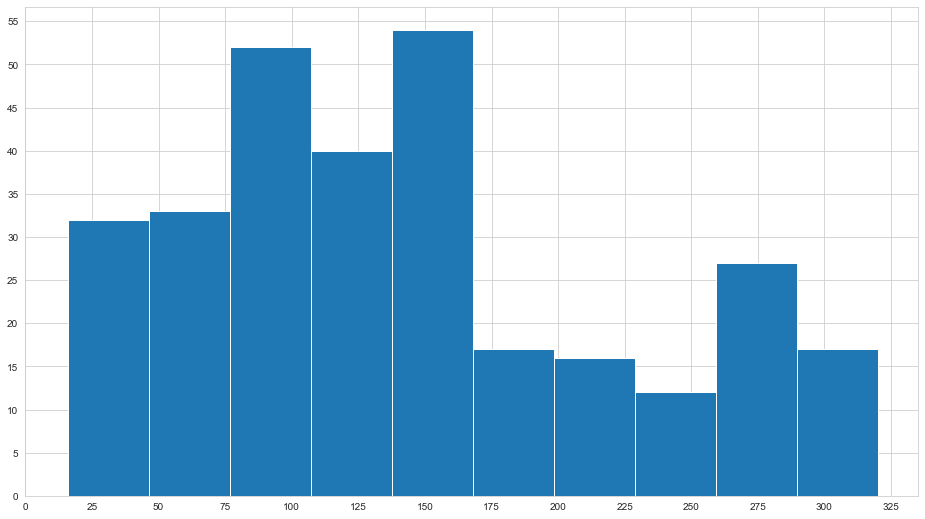

In [44]:
# Data Twitter

plt.figure(figsize=(16,9))
plt.hist(x=df_tweets.tweet.str.len())
plt.xticks(np.arange(0, 350, 25))
plt.yticks(np.arange(0, 60, 5))
plt.show()

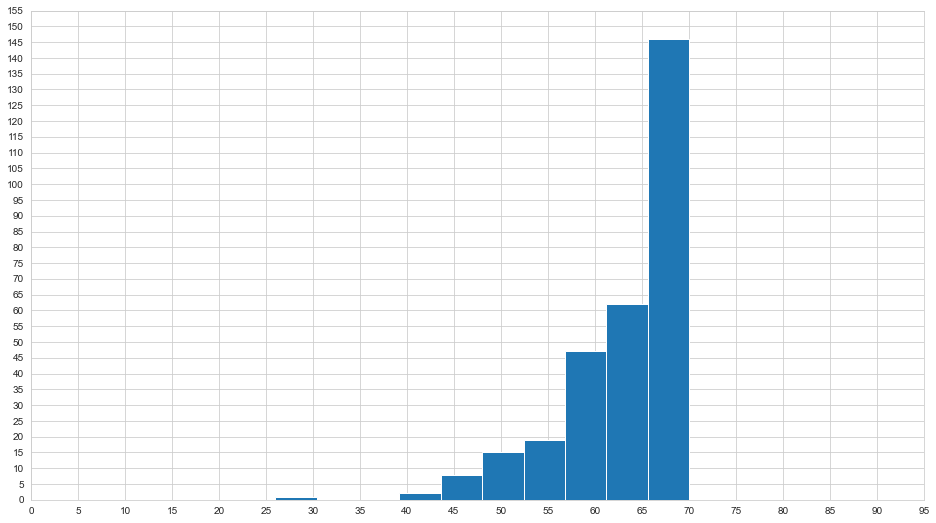

In [45]:
# Data Web

plt.figure(figsize=(16,9))
plt.hist(x=df_news['Judul Berita'].str.len())
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 160, 5))
plt.show()

Berdasarkan grafik diatas, distribusi terbanyak pada data dari twitter berada pada 100 - 150 karakter per data,sedangkan pada data dari web sebanyak 65 - 70 karakter per data. 

#### 2.2.2. Distribusi Frekuensi jumlah kata pada suatu data

Tahap ini dilakukan untuk mengtahui bagaimana persebaran jumlah kata pada data secara keseluruhan.

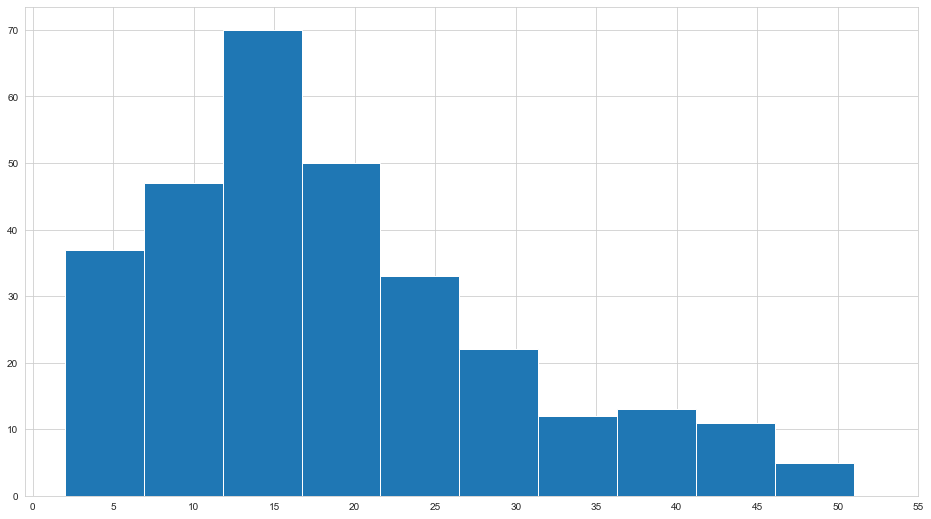

In [46]:
# Data Twitter

plt.figure(figsize=(16,9))
plt.hist(x=df_tweets.tweet.str.split().map(lambda x: len(x)))
plt.xticks(np.arange(0, 60, 5))
plt.yticks(np.arange(0, 80, 10))
plt.show()


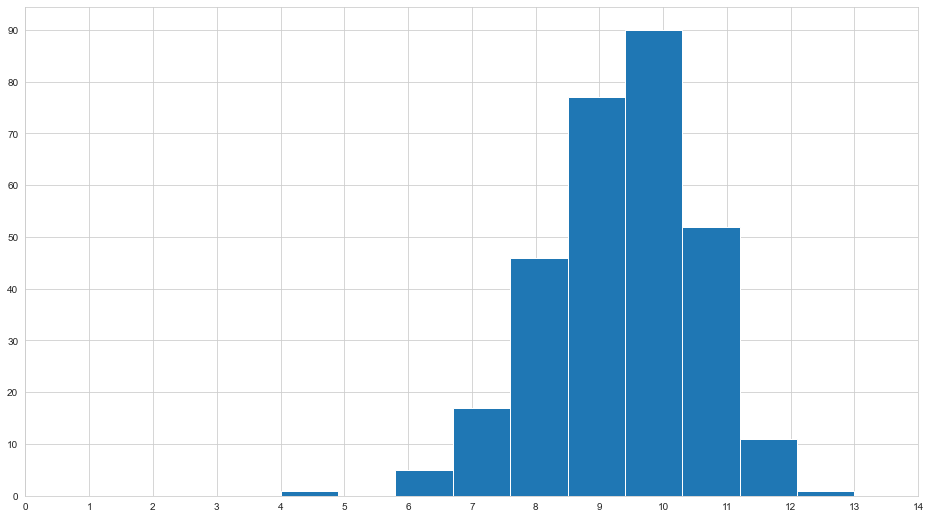

In [47]:
# Data Web

plt.figure(figsize=(16,9))
plt.hist(x=df_news['Judul Berita'].str.split().map(lambda x: len(x)))
plt.xticks(np.arange(0, 15, 1))
plt.yticks(np.arange(0, 100, 10))
plt.show()

Berdasarkan grafik diatas, distribusi terbanyak pada data dari twitter berada pada 15 kata per data,sedangkan pada data dari web sebanyak 10 kata per data.

#### 2.2.3. Distribusi Frekuensi panjang kata rata-rata pada suatu data

Tahap ini dilakukan untuk mengtahui bagaimana persebaran panjang kata rata-rata pada data secara keseluruhan.

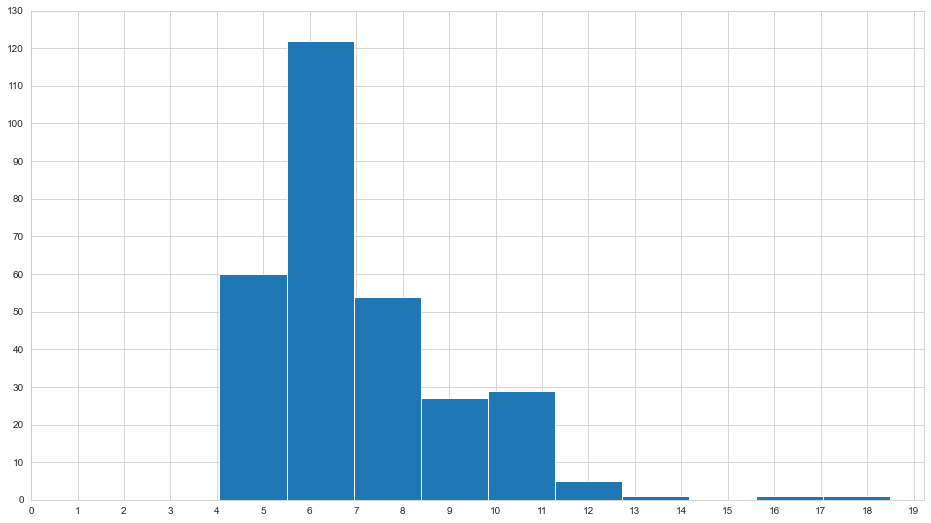

In [48]:
# Data Twitter

plt.figure(figsize=(16,9))
plt.hist(x=df_tweets.tweet.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)))
plt.xticks(np.arange(0, 20, 1))
plt.yticks(np.arange(0, 140, 10))
plt.show()

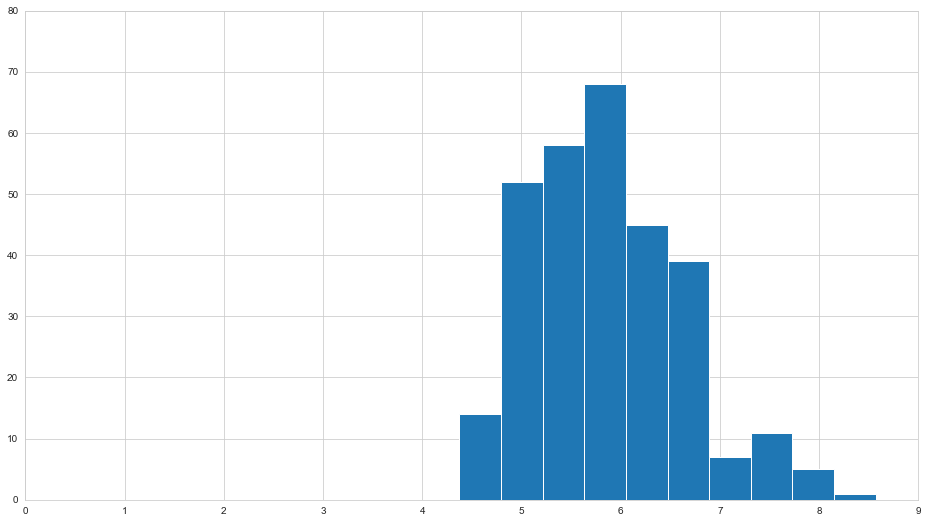

In [49]:
# Data Web

plt.figure(figsize=(16,9))
plt.hist(x=df_news['Judul Berita'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)))
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 90, 10))
plt.show()

Berdasarkan garfik diatas distribusi terbanyak pada data twitter berada pada 6 - 7 karakter per kata per data, sedangkan pada data web berada pada 6 karakter per kata per data. 

Jika kita gabungkan dengan ketiga hasil analisis sebelumnya, mayoritas tweet berada pada 15 kata dengan setiap kata berada di antara 6-7 karakter dan total 100 - 150 karakter. Disisi lain mayoritas data berita berada pada 10 kata dengan setiap kata berada di antara 6 karakter dan total 65-70 karakter. Nilai karakter per data pada twitter lebih banyak dibanding data web. hal ini karena pada twitter kalimat yang disampaikan berupa opini sedangkan pada web sifatnya berita sehingga lebih pendek.

#### 2.2.4. Distribusi Frekuensi kata yang sering keluar

Mencari Frekuensi kata yang sering keluar merupakan salah satu hal penting untuk dapat melakukan analisis secara kasar tentang bagaimana fitur yang dimiliki oleh data mentah. Pada tahap ini, dapat terlihat bahasa slang maupun karakter unik yang sering keluar yang bisa kita bersihkan. 

In [50]:
# Data Twitter

df_tweets['split'] = df_tweets.tweet.apply(lambda x: word_tokenize(str(x))) 

tweets = [word for tweet in df_tweets.tweet for word in tweet]
 
fqdist_tweets = FreqDist(tweets)

most_common_word_tweets = fqdist_tweets.most_common(40)

print(most_common_word_tweets)


[('a', 5121), (' ', 5053), ('i', 3130), ('n', 2336), ('e', 1880), ('s', 1776), ('t', 1623), ('r', 1506), ('o', 1474), ('l', 1459), ('k', 1324), ('u', 1304), ('p', 1228), ('g', 1128), ('m', 1021), ('d', 970), ('h', 833), ('b', 684), ('.', 541), ('y', 498), ('P', 441), ('j', 405), ('\n', 405), ('/', 394), ('c', 361), ('@', 343), ('A', 336), ('K', 250), ('I', 241), ('S', 235), ('w', 228), ('N', 224), ('#', 212), ('L', 207), (',', 206), ('T', 201), ('M', 198), ('O', 194), (':', 154), ('B', 152)]


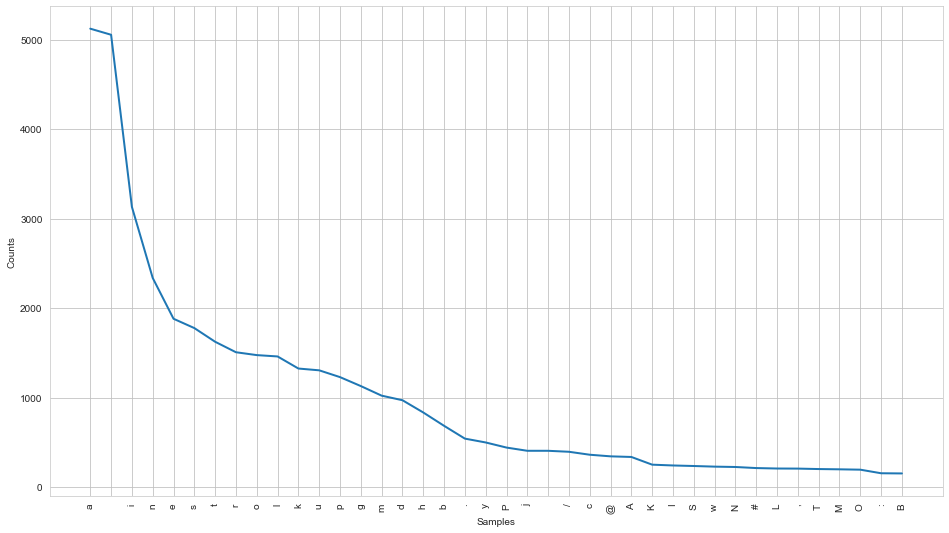

In [51]:
plt.figure(figsize=(16,9))

fqdist_tweets.plot(40,cumulative=False)

plt.show()

Pada grafik diatas menunjukkan karakter banyak karakter unik seperti: '@', '#', ',' , ':', dan '.', karakter seperti ini harus dilakukan proses pembersihan untuk memudahkan proses analisis selanjutnya. Selain itu, kata polisi muncul dalam berbagai format sehingga perlu dilakukan standarisasi agar formatnya sama.

In [52]:
# Data Web

df_news['split'] = df_news['Judul Berita'].apply(lambda x: word_tokenize(str(x)))

news = [word1 for data in df_news['Judul Berita'] for word1 in data]
 
fqdist_news = FreqDist(news)

most_common_word_news = fqdist_news.most_common(100)

print(most_common_word_news)


[(' ', 2532), ('a', 2425), ('i', 1397), ('n', 1184), ('e', 956), ('r', 883), ('u', 733), ('s', 704), ('o', 690), ('t', 590), ('l', 574), ('k', 543), ('g', 502), ('P', 470), ('d', 465), ('K', 303), ('m', 302), ('T', 293), ('p', 271), ('D', 250), ('h', 234), ('S', 221), ('b', 205), ('B', 204), ('M', 181), ('A', 166), ('j', 157), ('I', 130), ('y', 106), (',', 92), ('L', 90), ('J', 85), ('R', 83), (':', 79), ('w', 69), ('H', 58), ('N', 58), ('O', 55), ('C', 55), ('c', 54), ('E', 51), ('G', 50), ('2', 38), ('F', 36), ('V', 35), ('U', 34), ('1', 32), ('W', 26), ('f', 23), ('0', 20), ('3', 18), ('-', 17), ('z', 16), ('5', 13), ("'", 12), ('v', 11), ('6', 11), ('8', 10), ('7', 10), ('9', 9), ('4', 9), ('?', 5), ('.', 3), ('Z', 2), ('Y', 2), ('&', 2), ('q', 1)]


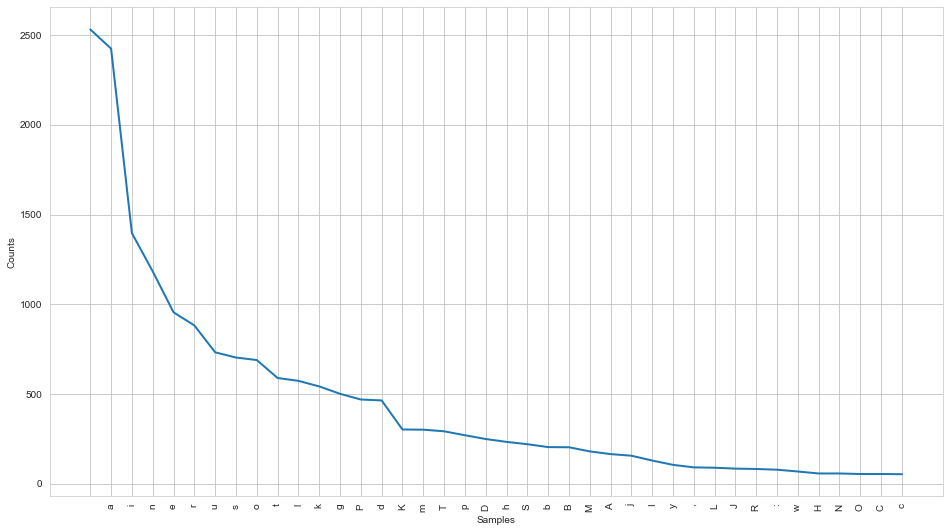

In [53]:
plt.figure(figsize=(16,9))

fqdist_news.plot(40,cumulative=False)

plt.show()

Pada grafik diatas kata polisi dan kanjuruhan muncul paling banyak. Selian itu, kata VIDEO sering muncul pada data berita. Kata VIDEO terlihat banyak karena banyak berita menyertakan judul dengan kata VIDEO sebagai tanda bahwa dalam berita tersebut terdapat video, sehingg data tersebut harus dihilangkan pada proses pembersihan. 

#### 2.2.5. Distribusi N-gram

N-gram adalah teknik pemotongan kata sebanyak N kata. Untuk pemotongan setiap dua kata disebut dengan bi-gram. Tahap ini dilakukan untuk mengetahui alasan dibalik mengapa suatu kata muncul sangat banyak pada suatu data mentah baik dalam twitter maupun berita online.

In [54]:
#Data Tweets

result_tweets = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:50]
 
print (result_tweets)

(a, n)    1063
(i,  )     808
(a,  )     758
(s, i)     617
(l, i)     550
(n,  )     546
(o, l)     540
(n, g)     528
(i, s)     510
( , p)     456
(a, r)     418
(e, r)     398
(k, a)     384
(p, o)     380
( , d)     355
(e, n)     351
(m, a)     345
(g, a)     345
(i, n)     334
(l, a)     333
(r, a)     332
(d, a)     328
(y, a)     319
( , s)     317
( , b)     315
(a, k)     311
(d, i)     306
(t, a)     294
(a, h)     289
( , k)     288
(a, t)     288
(g,  )     282
(r, i)     280
(a, s)     279
( , m)     276
(a, l)     269
(j, a)     261
(k,  )     238
(s, a)     238
(h,  )     234
(u,  )     227
(p, a)     226
( , P)     223
(b, a)     216
(a, m)     203
(t, i)     198
( , a)     190
(n, y)     189
(s,  )     184
(i, t)     183
dtype: int64


Berdasarkan bi-gram tersebut kita mendapat gambaran yang lebih jelas, bahwa keseluruhan tweet membahas tentang polisi dan gerakan melawan oligarki.
 

In [55]:
#Data News

result_news = pd.Series(nltk.ngrams(news, 2)).value_counts()[:50]
 
print (result_news)

(a, n)    702
(i,  )    492
( , P)    349
(a,  )    342
(n,  )    315
(n, g)    311
( , K)    248
(e, r)    244
( , T)    232
(o, l)    222
(s, i)    210
(t, a)    210
(d, i)    193
(k, a)    191
( , D)    190
(r, a)    189
( , B)    185
(a, r)    184
(i, s)    183
(l, i)    181
( , S)    172
(P, o)    172
(a, k)    168
(a, s)    163
( , d)    158
(d, a)    154
(K, a)    149
(P, e)    146
(a, t)    145
(e, n)    145
( , M)    144
(s,  )    141
(D, i)    136
( , A)    131
(r, i)    127
(k,  )    126
(g, a)    121
(t,  )    121
(u, r)    119
(i, n)    115
(h, a)    114
(g,  )    113
(a, l)    112
(r,  )    109
(l, a)    109
(r, u)    109
(l,  )    107
(T, e)     99
(e, m)     95
(u, h)     95
dtype: int64


Berdasarkan bi-gram tersebut kita mendapat gambaran yang lebih jelas, bahwa keseluruhan data berita membahas tentang polisi dengan kejaidna kanjuruhan dan wanita menerobos istana.
 

### 2.3. *Data Preprocessing*

Pada tahap ini data dilakukan proses pembersihan dari karakter unik, kata tidak berguna, dan kata sambung. Selain itu, dilakukan standarisasi format untuk semua kata agar memudahkan saat proses analisis selanjutnya.

#### 2.3.1. Membuat Fungsi *Text Preprocessing*

*Case Folding* dilakukan untuk menyamaratakan penggunaan huruf kapital menjadi huruf kecil (*lowercase*) semua. Sementara itu, karakter unik seperti tanda baca, angka, dan link dihapus atau diabaikan dengan menggunakan perintah yang ada di Python.

In [56]:
def case_folding_tweets(data):
    clean_list = []
    for kalimat in data:
        clean = re.sub(r'http[^\s]+', '', kalimat, flags=re.MULTILINE)
        clean = clean.lower()
        clean = re.sub(r'\d+', '', clean)
        clean = clean.translate(str.maketrans('','',string.punctuation))
        clean = clean.strip()
        clean_list.append(clean)
        
    return clean_list

In [57]:
def case_folding_news(data):
    clean_list = []
    for kalimat in data:
        clean = re.sub(r'http[^\s]+', '', kalimat, flags=re.MULTILINE)
        clean = clean.lower()
        clean = clean.translate(str.maketrans('','',string.punctuation))
        clean = clean.strip()
        clean_list.append(clean)
        
    return clean_list

*Filtering* dilakukan untuk menghilangkan karakter lain tidak penting seperti emoji, link selain https, dan karakter non ASCII

In [58]:
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

def filtering_tweets(tweet):
    clean_list = []
    for kalimat in tweet:
        # Menghapus @username
        review = re.sub(r'@[^\s]+', '', kalimat, flags=re.MULTILINE)
        # Menghapus #tagger
        review = re.sub(r'#([^\s]+)', '', review)
        # Menghapus #link       
        review = re.sub(r'co([^\s]+)', '', review)
        # Menghapus non ASCII chars
        review = re.sub(r'[^\x00-\x7f]', r'', review)
        review = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', review)
        review = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", review)
        review = re.sub(r'\\u\w\w\w\w', '', review)
        # Menghapus simbol, angka dan karakter aneh
        review = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ", review)
        # Menghapus emoji
        review = emoji_pattern.sub(r'', review)
        
        clean_list.append(review)
    return clean_list

In [59]:
def filtering_news(data):
    clean_list = []
    for kalimat in data:
        # Menghapus kata video
        review = re.sub('video', '', kalimat)
        clean_list.append(review)
        
    return clean_list

*Stopword* adalah kata umum yang biasanya muncul dan tidak memiliki makna. Misalnya penggunaan kata penghubung seperti dan, yang,serta, setelah, dan lainnya. Penghilangan *stopword*  ini dapat mengurangi ukuran indeks dan waktu pemrosesan.

In [60]:
def stopword(data):
    clean_list = []
    for kalimat in data:
        # Menghilangkan kata-kata yang tidak terpakai atau banyak
        stop_factory  = StopWordRemoverFactory().get_stop_words()
        data          = stop_factory
        dictionary    = ArrayDictionary(data)
        str           = StopWordRemover(dictionary)
        clean         = str.remove(kalimat)
        
        clean_list.append(clean)
        
    return clean_list

Fungsi convertToSlangword digunakna untuk mengubah kata tidak baku menjadi kata baku dalma bahasa indonesia.

In [61]:
file        = open('slang_words.txt', 'r')
content     = file.read()
slang_words = ast.literal_eval(content)

def convertToSlangword(data):
    clean_list = []
    for kalimat in data:
        new_string = " ".join(slang_words.get(word, word) for word in kalimat.split(' '))
        clean_list.append(new_string)
        
    return clean_list

Stemming adalah tahapan yang juga diperlukan untuk memperkecil jumlah indeks yang berbeda dari satu data sehingga sebuah kata yang memiliki suffix maupun prefix akan kembali ke bentuk dasarnya. Selain itu juga untuk melakukan pengelompokan kata-kata lain yang memiliki kata dasar dan arti yang serupa namun memiliki bentuk yang berbeda karena mendapatkan imbuhan yang berbeda pula.

In [62]:
def stemming(data):
    clean_list = []
    for kalimat in data:
        # Mengembalikan semua kata ke dalam bentuk dasarnya
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        hasil   = stemmer.stem(kalimat)
        
        clean_list.append(hasil)
        
    return clean_list

#### 2.3.2. Melakukan Pembersihan Data Twitter

In [63]:
df_tweets['clean_tweet'] = filtering_tweets(df_tweets.tweet)
df_tweets['clean_tweet'] = stopword(df_tweets.clean_tweet)
df_tweets['clean_tweet'] = stemming(df_tweets.clean_tweet)
df_tweets['clean_tweet'] = case_folding_tweets(df_tweets.clean_tweet)
df_tweets['clean_tweet'] = convertToSlangword(df_tweets.clean_tweet)

df_tweets.head(20)

,tweet,split,clean_tweet
0,Kepala Cabdis ESDM Sumut Secepatnya Surati Pol...,"[Kepala, Cabdis, ESDM, Sumut, Secepatnya, Sura...",kepala cabdis esdm sumut cepat surati polisi u...
1,PENDIDIKAN: seorang guru fisika di tangkap pol...,"[PENDIDIKAN, :, seorang, guru, fisika, di, tan...",didik guru fisika tangkap polisi dorong murid ...
2,Dulu pahlawan berjuang melawan Penjajah sekara...,"[Dulu, pahlawan, berjuang, melawan, Penjajah, ...",dulu pahlawan juang lawan jajah lawan oligarki...
3,@Midjan_La_2 Broh lu klo posting berita lain k...,"[@, Midjan_La_2, Broh, lu, klo, posting, berit...",anda kalau posting berita serta tanggal jadi ...
4,Jgn jd polisi dek mending jadi petani sukses a...,"[Jgn, jd, polisi, dek, mending, jadi, petani, ...",jangan jadi polisi adik lebih baik tani sukses...
5,@memefess Soal bokep polisi jagonya,"[@, memefess, Soal, bokep, polisi, jagonya]",soal porno polisi jago
6,🔴LIVE! VIRAL! VIDEO ISMAIL BOLONG HALANGI PETU...,"[🔴LIVE, !, VIRAL, !, VIDEO, ISMAIL, BOLONG, HA...",live viral video ismail bolong halang tugas kp...
7,@Mamas_ee @geloraco @hemaviton99 @ListyoSigitP...,"[@, Mamas_ee, @, geloraco, @, hemaviton99, @, ...",sudah bagus yang sulit cari pernah suatu waktu...
8,Macet dan semrawut rutin tiap pagi di CBD Cile...,"[Macet, dan, semrawut, rutin, tiap, pagi, di, ...",macet semrawut rutin pagi cbd ciledug angkot n...
9,HARUS UNGKAP PERSEKONGKOLAN GENG TAMBANG DI PO...,"[HARUS, UNGKAP, PERSEKONGKOLAN, GENG, TAMBANG,...",harus ungkap sekongkol geng tambang di polisi ...


#### 2.3.3. Melakukan Pembersihan Data Web

In [64]:
df_news['clean_news'] = case_folding_news(df_news['Judul Berita'])
df_news['clean_news'] = filtering_news(df_news['clean_news'])
df_news['clean_news'] = stopword(df_news['clean_news'])
df_news['clean_news'] = stemming(df_news['clean_news'])
df_news['clean_news'] = convertToSlangword(df_news['clean_news'])
df_news

,Judul Berita,split,clean_news
0,Ketua RT Sempat Ingatkan Keluarga Tewas di Kal...,"[Ketua, RT, Sempat, Ingatkan, Keluarga, Tewas,...",ketua rt ingat keluarga tewas kalideres bayar ...
1,"Selain Selingkuh, Anggota Polsek Pondok Aren J...","[Selain, Selingkuh, ,, Anggota, Polsek, Pondok...",selingkuh anggota polsek pondok aren lapor kdrt
2,Ketua RT: Ada Kapur Barus dan Lilin di Rumah K...,"[Ketua, RT, :, Ada, Kapur, Barus, dan, Lilin, ...",ketua rt kapur barus lilin rumah korban tewas ...
3,Polisi Selidiki Hilangnya Mobil Milik Keluarga...,"[Polisi, Selidiki, Hilangnya, Mobil, Milik, Ke...",polisi selidik hilang mobil milik keluarga tew...
4,Polisi Tetapkan 2 Tersangka Kasus Atap SD di G...,"[Polisi, Tetapkan, 2, Tersangka, Kasus, Atap, ...",polisi tetap 2 sangka atap sd gunungkidul ambruk
...,...,...,...
295,"Ledakan di Asrama Polisi Sukoharjo, Seorang Br...","[Ledakan, di, Asrama, Polisi, Sukoharjo, ,, Se...",ledak asrama polisi sukoharjo bripka luka
296,Penjinak Bom Diterjunkan ke TKP Ledakan di Asr...,"[Penjinak, Bom, Diterjunkan, ke, TKP, Ledakan,...",jinak bom terjun tkp ledak asrama polisi sukoh...
297,"Siswi SMP di Makassar Dikeroyok 4 Teman, Sesak...","[Siswi, SMP, di, Makassar, Dikeroyok, 4, Teman...",siswi smp makassar keroyok 4 teman sesak napas...
298,3.800 Personel Diterjunkan Kawal Demo BBM PA 2...,"[3.800, Personel, Diterjunkan, Kawal, Demo, BB...",3800 personel terjun kawal demo bbm pa 212 pat...


## 3. *Topic Analysis*

*Topic Analysis* adalah salah satu teknik untuk mengerti data teks dengan memberikan "*tags*" pada data tersebut sesuai dengan topik dari teks tersebut. *Topic Analysis*   memanfaatkan *Natural Language Processing*  untuk mereka ulang struktur data teks dan menemukan pola-pola yang terdapat didalamnya. 

*Topic Modeling* adalah teknik *unsupervised* yang mencoba mencari topik berdasarkan pola dari data yang dimiliki. Pada analisis kali ini menggunakan teknik *unsupervised*. *Modeling* pada data mentah headline berita yang diambil pada situs CNNIndonesia.com dengan kata kunci polisi.

### 3.1. Melakukan *splitting* kata pada data berita

In [65]:
data_berita = [berita.split() for berita in df_news.clean_news]
data_berita

[['ketua',
  'rt',
  'ingat',
  'keluarga',
  'tewas',
  'kalideres',
  'bayar',
  'listrik'],
 ['selingkuh', 'anggota', 'polsek', 'pondok', 'aren', 'lapor', 'kdrt'],
 ['ketua',
  'rt',
  'kapur',
  'barus',
  'lilin',
  'rumah',
  'korban',
  'tewas',
  'kalideres'],
 ['polisi',
  'selidik',
  'hilang',
  'mobil',
  'milik',
  'keluarga',
  'tewas',
  'kalideres'],
 ['polisi', 'tetap', '2', 'sangka', 'atap', 'sd', 'gunungkidul', 'ambruk'],
 ['nestapa', 'anak', 'tani', 'gugur', 'polwan', 'polda', 'malu', 'utara'],
 ['kondisi', 'mayat', 'kalideres', 'asupan', 'makan', 'otot', 'kecil'],
 ['5',
  'polisi',
  'timpa',
  'pohon',
  'tumbang',
  'balkot',
  'dki',
  'rujuk',
  'rs',
  'polri'],
 ['hasil', 'autopsi', 'mayat', 'kalideres', 'tanda', 'keras'],
 ['sopir',
  'mobil',
  'bawa',
  'jeriken',
  'bbm',
  'bakar',
  'jakpus',
  'temu',
  'polisi',
  'rs'],
 ['surat',
  'cinta',
  'polisi',
  'urus',
  'bukti',
  'pelanggaran',
  'stnk',
  'blokir'],
 ['13',
  'demo',
  'kibar',
  'bint

### 3.2. Membuat sebuah variabel yang isinya melakukan maping kata dalam satu dokumen terhadap semua kata pada dataset.

In [66]:
dictionary = corpora.Dictionary(data_berita)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_berita]

### 3.3. Membuat model analisis dengan 5 buah topik

In [67]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(
    random_state=100,
    chunksize=100,
    per_word_topics=True,
    corpus = doc_term_matrix, 
    num_topics=5, 
    id2word = dictionary, 
    passes=50
    )

In [68]:
pprint(ldamodel.print_topics())

[(0,
  '0.057*"polisi" + 0.016*"kdrt" + 0.014*"dendang" + 0.014*"goyang" + '
  '0.013*"istana" + 0.013*"rizky" + 0.013*"billar" + 0.013*"perempuan" + '
  '0.013*"terobos" + 0.012*"pakai"'),
 (1,
  '0.052*"polisi" + 0.025*"anggota" + 0.020*"tangkap" + 0.015*"tni" + '
  '0.015*"mobil" + 0.012*"dan" + 0.012*"tewas" + 0.012*"ledak" + 0.011*"istri" '
  '+ 0.011*"keluarga"'),
 (2,
  '0.023*"polri" + 0.017*"kapolri" + 0.015*"istana" + 0.013*"tembak" + '
  '0.013*"anak" + 0.012*"larang" + 0.011*"warga" + 0.009*"kronologi" + '
  '0.009*"utara" + 0.008*"pelanggaran"'),
 (3,
  '0.065*"kanjuruhan" + 0.029*"korban" + 0.029*"polisi" + 0.027*"tragedi" + '
  '0.023*"air" + 0.020*"gas" + 0.014*"temu" + 0.014*"autopsi" + 0.014*"polri" '
  '+ 0.012*"ham"'),
 (4,
  '0.054*"kanjuruhan" + 0.048*"polisi" + 0.033*"tragedi" + 0.021*"sangka" + '
  '0.016*"polda" + 0.014*"periksa" + 0.013*"6" + 0.013*"jatim" + 0.011*"tahan" '
  '+ 0.011*"minahasa"')]


Angka di awal tuple adalah indeks topiknya (0-4) karena kita memilih 5 topik. Angka di sebelah kiri kata adalah nilai bobot dari kata tersebut terhadap topik yang bersangkutan (misalnya polisi bernilai 0.057 pada topik 0).


Misalkan indeks 0 karena terdapat kata polisi, kdrt, dendang, goyang, istana, rizky, billar, perempuan, terobos, dan pakai. Dapat disimpulkan bahwa Topik A menjelaskan tentang larangan polisi mengamankan perempuan yang menorobos istana dan polisi mengamankan rizky billar karena KDRT.

### 3.4. Mengitung *Coherence Value*

In [69]:
coherence_model_lda = CoherenceModel(model=ldamodel, texts=data_berita, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.493005853622927


*Coherence value* menunjukkan nilai jarak dari setiap kata pada suatu topik. Nilainya berada di antara 0 - 1

### 3.5. Melakukan *hyper tuning parameter* pada model kita untuk memperbaiki *coherence value*

In [70]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_berita, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

Setelah membuat fungsi *hyper tuning parameter*, maka lakukan proses pencarian nilai koheren terhadap parameter yang dimiliki. karena itu kita kan mencari nilai k, a, dan b terbaik.

In [71]:
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(doc_term_matrix)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.75), 
               doc_term_matrix]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

100%|██████████████████████████████████████████████████████████████████████████████| 540/540 [1:42:49<00:00, 11.43s/it]


*Validasi Set* digunakan untuk memvalidasi data yang kita gunakan, pada kesempatan ini dibagi menjadi saat 75% data dengan 100% data.

### 3.6. Menyimpan hasil *hyper tuning parameter* pada *Data Frame*

In [72]:
df_tuning_result = pd.read_csv("lda_tuning_results.csv")
display(df_tuning_result)

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.544922
1,75% Corpus,2,0.01,0.31,0.532592
2,75% Corpus,2,0.01,0.61,0.526882
3,75% Corpus,2,0.01,0.9099999999999999,0.534635
4,75% Corpus,2,0.01,symmetric,0.526882
...,...,...,...,...,...
535,100% Corpus,10,asymmetric,0.01,0.431474
536,100% Corpus,10,asymmetric,0.31,0.402263
537,100% Corpus,10,asymmetric,0.61,0.368227
538,100% Corpus,10,asymmetric,0.9099999999999999,0.370423


Pilih salah satu angka dengan nilai yang sama. Contoh: memilih alpha = 0.01 & beta 0.3. Ini dilakukan untuk melihat nilai k (topik) terbaik. Lalu melakukan plot coherence value terhadap topik. Ini dilakukan untuk melihat nilai k (topik) terbaik.

<AxesSubplot:xlabel='Topics'>

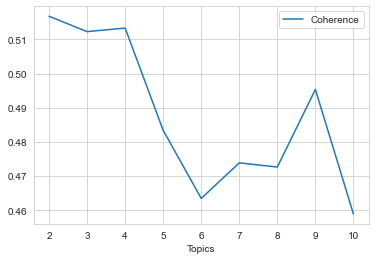

In [73]:
df_plot = df_tuning_result[(df_tuning_result.Alpha == "0.01") & (df_tuning_result.Beta == "0.31") & (df_tuning_result.Validation_Set == "100% Corpus")].copy()
df_plot.plot(x='Topics', y = "Coherence", kind="line")

Berdasarkan pada hal tersebut maka kita akan memilih k = 3. Selanjutnya kita akan memilih alpha dan beta terbaik, caranya adalah dengan memilih k = 3 pada tabel, dan cari kombinasi alpha dan beta dengan coherence value terbaik

In [89]:
df_plot_2 = df_tuning_result[(df_tuning_result.Topics == 3) & (df_tuning_result.Validation_Set == "100% Corpus")].copy()
df_plot_2.sort_values(by="Coherence", ascending=False)

,Validation_Set,Topics,Alpha,Beta,Coherence
311,100% Corpus,3,0.61,0.31,0.523175
314,100% Corpus,3,0.61,symmetric,0.519593
325,100% Corpus,3,asymmetric,0.01,0.515376
317,100% Corpus,3,0.9099999999999999,0.61,0.514746
313,100% Corpus,3,0.61,0.9099999999999999,0.513322
301,100% Corpus,3,0.01,0.31,0.512302
318,100% Corpus,3,0.9099999999999999,0.9099999999999999,0.512283
303,100% Corpus,3,0.01,0.9099999999999999,0.511509
304,100% Corpus,3,0.01,symmetric,0.510958
302,100% Corpus,3,0.01,0.61,0.509760


Berdasarkan tabel diatas, *coherence value*  terbaik ada saat nilai alpha 0.91 dan beta 0.91

### 3.7. Membuat ulang kembali model dengan *coherence value* terbaik

In [90]:
lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=3, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.91)

In [91]:
pprint(lda_model.print_topics())

[(0,
  '0.032*"polisi" + 0.011*"kanjuruhan" + 0.010*"tangkap" + 0.009*"duga" + '
  '0.008*"periksa" + 0.008*"istana" + 0.008*"anggota" + 0.008*"sangka" + '
  '0.008*"tragedi" + 0.007*"polri"'),
 (1,
  '0.040*"polisi" + 0.011*"ledak" + 0.008*"sukoharjo" + 0.008*"asrama" + '
  '0.007*"lapor" + 0.006*"tewas" + 0.006*"mobil" + 0.006*"luka" + '
  '0.006*"tembak" + 0.005*"polda"'),
 (2,
  '0.039*"kanjuruhan" + 0.019*"tragedi" + 0.011*"korban" + 0.010*"air" + '
  '0.009*"gas" + 0.008*"polri" + 0.007*"tembak" + 0.007*"autopsi" + '
  '0.006*"polisi" + 0.005*"temu"')]


## 4. *Sentiment Analysis*

*Sentiment Analysis* adalah kegiatan kita dalam menganalisis dan menilai suatu sentimen dalam sebuah kalimat. *Sentiment Analysis* masuk kedalam tahapan klustering saat kita melakukan analisis data awal. Analsisi diharapkan memberikan gambaran dengan lebih jelas tentang opini populasi secara luas dari sample yang diambil.

*Sentiment Analysis* dilakukan agar kita dapat menilai sentimen masyarakat terhadap suatu topik melalui opini yang mereka keluarkan. Sumber yang diambil pada analisis kali ini diambil dari twitter sebagai sosial media dengan kecepatan *update* terbaik.

*Sentiment Analysis* dilakukan secara sederhana dengan menggunakan perbandingan isi kalimat terhadap suatu kumpulan data mentah sentimen yang dimabil dari twitter. Data mentah yang akan kita bandingkan adalah dataset kata positif dan negatif. Dataset kata positif dan negatiftersebut sudah saya siapkan dalam file di bawah ini.
(sumber: https://github.com/riochr17/Analisis-Sentimen-ID )

In [77]:
with open("kata_positif.txt","r") as positif_file :
    positive_words = positif_file.readlines()
with open("kata_negatif.txt","r") as negative_file :
    negative_words = negative_file.readlines()

### 4.1. Melakukan pencarian setiap kata positif dan negatif pada tweet dan menghitung totalnya.

In [78]:
hasil = []


for tweet in df_tweets.clean_tweet:

    tweet_clean = tweet.strip().split()
    
    good_count = 0 #nilai positif
    bad_count  = 0 #nilai negatif

    for good_word in positive_words:
        good  = good_word.strip().lower()
        count = tweet_clean.count(good)
        if count > 0:
            print(good_word.strip())
            good_count += count

    for bad_word in negative_words:
        bad   = bad_word.strip().lower()
        count = tweet_clean.count(bad)
        if count > 0:
            print(bad_word.strip())
            bad_count += count
    
    print ("positif: "+str(good_count))
    print ("negatif: "+str(bad_count))
    hasil.append(good_count - bad_count)
    print ("-----------------------------------------------------")

cepat
giat
izin
positif: 3
negatif: 0
-----------------------------------------------------
didik
dorong
positif: 2
negatif: 0
-----------------------------------------------------
pahlawan
jajah
lawan
positif: 1
negatif: 3
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
baik
hidup
sukses
positif: 3
negatif: 0
-----------------------------------------------------
jago
jago
porno
porno
positif: 2
negatif: 2
-----------------------------------------------------
geng
judi
liar
terlarang
positif: 0
negatif: 5
-----------------------------------------------------
bagus
banyak
aib
sial
sulit
sial
sial
sulit
positif: 2
negatif: 6
-----------------------------------------------------
macet
positif: 0
negatif: 1
-----------------------------------------------------
geng
positif: 0
negatif: 1
-----------------------------------------------------
repot
positif: 0
negatif: 1
------------------------------------------

positif: 0
negatif: 0
-----------------------------------------------------
lolos
kok
padahal
positif: 1
negatif: 2
-----------------------------------------------------
geng
positif: 0
negatif: 1
-----------------------------------------------------
lulus
padahal
positif: 1
negatif: 1
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
pahlawan
selamat
teladan
positif: 4
negatif: 0
-----------------------------------------------------
baik
positif: 1
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
geng
positif: 0
negatif: 1
-----------------------------------------------------
geng
positif: 0
negatif: 1
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
salah
positif: 0
negatif: 2
-----------------------------------------------------
bunuh

positif: 0
negatif: 0
-----------------------------------------------------
emang
positif: 0
negatif: 1
-----------------------------------------------------
patroli
tahu
positif: 2
negatif: 0
-----------------------------------------------------
baik
positif: 1
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
adil
sita
positif: 1
negatif: 1
-----------------------------------------------------
aneh
hina
positif: 0
negatif: 2
-----------------------------------------------------
cepat
kerja
kalah
positif: 2
negatif: 1
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
ayo
benar
menang
justru
salah
positif: 3
negatif: 2
-----------------------------------------------------
prestasi
kasus
porno
porno
positif: 1
negatif: 3
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------

### 4.2. Mengkategorikan hasil sentimen ke dalam kategori netral, negatif, dan positif. 

Total Nilai > 0, maka sentimen positif
Total Nilai < 0, maka sentimen negatif
Total Nilai = 0, maka sentimen netral

In [79]:
sentiments = ["positif" if sentimen > 0 else ("netral" if sentimen == 0 else "negatif") for sentimen in hasil]

df_tweets["sentiment"] = sentiments

df_tweets

,tweet,split,clean_tweet,sentiment
0,Kepala Cabdis ESDM Sumut Secepatnya Surati Pol...,"[Kepala, Cabdis, ESDM, Sumut, Secepatnya, Sura...",kepala cabdis esdm sumut cepat surati polisi u...,positif
1,PENDIDIKAN: seorang guru fisika di tangkap pol...,"[PENDIDIKAN, :, seorang, guru, fisika, di, tan...",didik guru fisika tangkap polisi dorong murid ...,positif
2,Dulu pahlawan berjuang melawan Penjajah sekara...,"[Dulu, pahlawan, berjuang, melawan, Penjajah, ...",dulu pahlawan juang lawan jajah lawan oligarki...,negatif
3,@Midjan_La_2 Broh lu klo posting berita lain k...,"[@, Midjan_La_2, Broh, lu, klo, posting, berit...",anda kalau posting berita serta tanggal jadi ...,netral
4,Jgn jd polisi dek mending jadi petani sukses a...,"[Jgn, jd, polisi, dek, mending, jadi, petani, ...",jangan jadi polisi adik lebih baik tani sukses...,positif
...,...,...,...,...
295,@fullmoonfolks bilangnya polisi soalnya universal,"[@, fullmoonfolks, bilangnya, polisi, soalnya,...",bilang polisi universal,netral
296,@sutanmangara Aku bikin tumpengan kl anies mas...,"[@, sutanmangara, Aku, bikin, tumpengan, kl, a...",aku bikin tumpeng kalau anies penjara selain n...,negatif
297,SBY dan AHY Dilaporkan ke Polisi! https://t.co...,"[SBY, dan, AHY, Dilaporkan, ke, Polisi, !, htt...",sby ahy lapor polisi bengkulu,netral
298,@6undul0h Matamu di buka yg lebar Cok @ListyoS...,"[@, 6undul0h, Matamu, di, buka, yg, lebar, Cok...",mata buka yang lebar cok cok makin polisi yang...,negatif


### 4.3. Melakukan *Plotting* Hasil Sentimen Pada Setiap Tweet

#### 4.3.1. Grafik Distribusi Sentimen

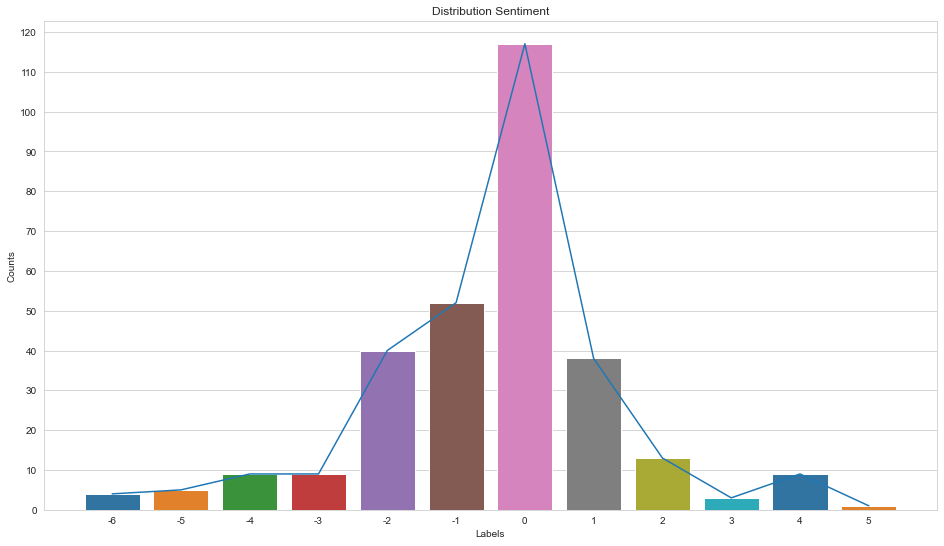

In [81]:
labels, counts = np.unique(hasil, return_counts=True)

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xticks(ax.get_xticks())

sns.barplot(x = labels, y = counts, palette="tab10")

sns.lineplot(x = ax.get_xticks(), y = counts)

plt.title(f'Distribution Sentiment')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.yticks(np.arange(0, 130, 10))

plt.show()

#### 4.3.2. Grafik Kategori Sentimen

C:\Users\Gian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


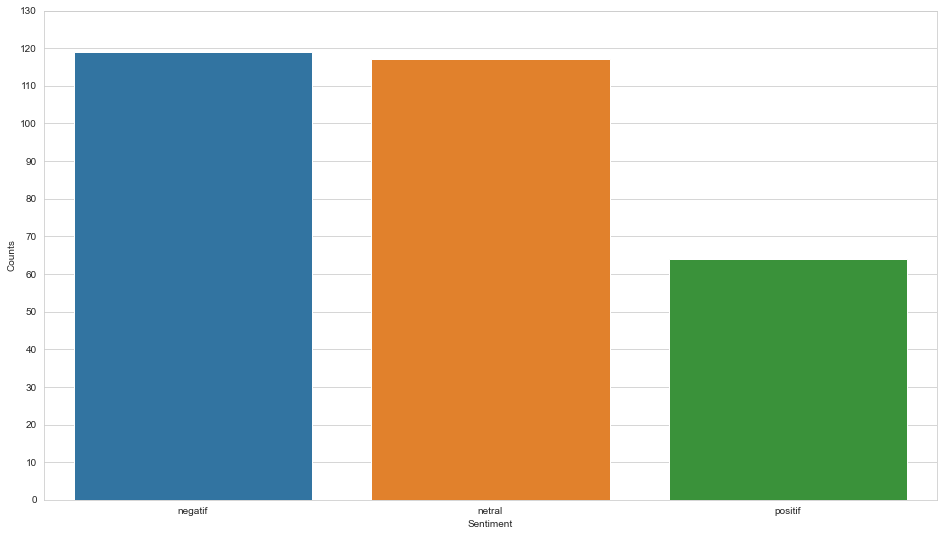

In [84]:
plt.figure(figsize=(16,9))
sns.barplot(df_tweets['sentiment'].value_counts().index,df_tweets['sentiment'].value_counts())
plt.yticks(np.arange(0, 140, 10))
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

### 4.4. Menghitung Jumlah Data dengan Sentimen Positif, Negatif, dan Netral

In [82]:
df_tweets['sentiment'].value_counts()

negatif    119
netral     117
positif     64
Name: sentiment, dtype: int64

In [83]:
df_tweets['sentiment'].value_counts(normalize=True)*100

negatif    39.666667
netral     39.000000
positif    21.333333
Name: sentiment, dtype: float64

### 4.5. Menampilkan Data Statistika Deskriptif

In [80]:
print (f'''
Mean: {np.mean(hasil)}
Median: {np.median(hasil)}
quartil awal: {np.quantile(hasil,0.25)}
quartil akhir: {np.quantile(hasil,0.75)}
Standar deviasi: {np.std(hasil)}     
''')


Mean: -0.43333333333333335
Median: 0.0
quartil awal: -1.0
quartil akhir: 0.0
Standar deviasi: 1.7660376238599473     



## 5. *Reporting*

### 5.1. Analisis Akhir

#### 5.1.1. Topic Analysis

Analisis terhadap setiap topik pada berita online CNN Indonesia adalah:
1) Polisi menangkap dan memeriksa anggota Polisi yang menjadi tersangka pada tragedi kanjuruhan
2) Polisi Melaporjan terjadi ledakan di Asrama Polisi Sokuharjo, ada anggota polisi yang mengalami luka
3) Hasil temuan autopsi korban, polisi menembakan gas air mata terhadap suporter pada tragedi kanjuruhan


#### 5.1.2. Sentiment Analysis

Berdasarkan hasil analisis sentimen tweet dengan metode *text mining* untuk topik 'polisi' didapatkan sentimen negatif lebih dominan yaitu sebanyak 119 (39,66%) tweet, diikuti oleh sentimen netral sebanyak 117 (39,00%) tweet dan sentimen positif dengan jumlah 64(21,33%) dari total 300 tweet.


### 5.2. Kesimpulan

Berdasarkan hasil dari dua metode yang telah dilakukan dapat ditarik kesimpulan bahwa, akibat ulah oknum polisi indonesia terutama pada tragedi kanjuruhan yang menembakan gas air mata ke penonton membuat sentimen masyarakat terhadap polisi indonesia bernada negatif khusunya di platform twitter. Hasil analasis ini dapat menjadi acuan untuk polisi indonesia untuk berbenah diri dalam melayani, melindungi, dan menyayomi masyarakat sehingga secara tidak langsung akan memperbaiki citra polisi di kalangan masyarakat menjadi lebih baik.